In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('momentum.csv')
df.head()

,Ticker,Price,One Year Price Return,One Year Return Percentile,Six Month Price Return,Six Month Return Percentile,Three Month Price Return,Three Month Return Percentile,One Month Price Return,One Month Return Percentile,Momentum Score,Number of Shares to Buy
0,FANG,$102.81,167.05%,98.42%,110.39%,99.80%,23.90%,95.84%,15.58%,97.23%,97.82%,786
1,NVDA,$836.32,117.59%,92.67%,57.08%,96.24%,47.60%,100.00%,25.29%,99.60%,97.13%,96
2,DXC,$42.36,156.16%,97.43%,58.69%,96.83%,31.47%,99.01%,6.28%,83.56%,94.21%,1909
3,OXY,$32.72,92.75%,85.54%,91.00%,99.21%,20.26%,92.28%,15.90%,97.43%,93.61%,2472
4,IT,$258.87,107.52%,91.09%,57.23%,96.44%,32.85%,99.60%,6.90%,84.75%,92.97%,312


In [3]:
df.columns

Index(['Ticker', 'Price', 'One Year Price Return',
       'One Year Return Percentile', 'Six Month Price Return',
       'Six Month Return Percentile', 'Three Month Price Return',
       'Three Month Return Percentile', 'One Month Price Return',
       'One Month Return Percentile', 'Momentum Score',
       'Number of Shares to Buy'],
      dtype='object')

In [4]:
df.dtypes

Ticker                           object
Price                            object
One Year Price Return            object
One Year Return Percentile       object
Six Month Price Return           object
Six Month Return Percentile      object
Three Month Price Return         object
Three Month Return Percentile    object
One Month Price Return           object
One Month Return Percentile      object
Momentum Score                   object
Number of Shares to Buy           int64
dtype: object

In [5]:
df.replace('%', '', regex=True, inplace=True)
df.drop(['Ticker'], axis=1, inplace=True)
df.head()

,Price,One Year Price Return,One Year Return Percentile,Six Month Price Return,Six Month Return Percentile,Three Month Price Return,Three Month Return Percentile,One Month Price Return,One Month Return Percentile,Momentum Score,Number of Shares to Buy
0,$102.81,167.05,98.42,110.39,99.80,23.90,95.84,15.58,97.23,97.82,786
1,$836.32,117.59,92.67,57.08,96.24,47.60,100.00,25.29,99.60,97.13,96
2,$42.36,156.16,97.43,58.69,96.83,31.47,99.01,6.28,83.56,94.21,1909
3,$32.72,92.75,85.54,91.00,99.21,20.26,92.28,15.90,97.43,93.61,2472
4,$258.87,107.52,91.09,57.23,96.44,32.85,99.60,6.90,84.75,92.97,312


In [6]:
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].replace({'\$': '', ',': '', '\s+': ''}, regex=True).str.strip()
df['Price'] = pd.to_numeric(df['Price'])
df.head()

,Price,One Year Price Return,One Year Return Percentile,Six Month Price Return,Six Month Return Percentile,Three Month Price Return,Three Month Return Percentile,One Month Price Return,One Month Return Percentile,Momentum Score,Number of Shares to Buy
0,102.81,167.05,98.42,110.39,99.80,23.90,95.84,15.58,97.23,97.82,786
1,836.32,117.59,92.67,57.08,96.24,47.60,100.00,25.29,99.60,97.13,96
2,42.36,156.16,97.43,58.69,96.83,31.47,99.01,6.28,83.56,94.21,1909
3,32.72,92.75,85.54,91.00,99.21,20.26,92.28,15.90,97.43,93.61,2472
4,258.87,107.52,91.09,57.23,96.44,32.85,99.60,6.90,84.75,92.97,312


In [7]:
df['One Year Price Return'] = df['One Year Price Return'].apply(pd.to_numeric) / 100
df['One Year Return Percentile'] = df['One Year Return Percentile'].apply(pd.to_numeric) / 100
df['Six Month Price Return'] = df['Six Month Price Return'].apply(pd.to_numeric) / 100
df['Six Month Return Percentile'] = df['Six Month Return Percentile'].apply(pd.to_numeric) / 100
df['Three Month Price Return'] = df['Three Month Price Return'].apply(pd.to_numeric) / 100
df['Three Month Return Percentile'] = df['Three Month Return Percentile'].apply(pd.to_numeric) / 100
df['One Month Price Return'] = df['One Month Price Return'].apply(pd.to_numeric) / 100
df['One Month Return Percentile'] = df['One Month Return Percentile'].apply(pd.to_numeric) / 100
df.head()

,Price,One Year Price Return,One Year Return Percentile,Six Month Price Return,Six Month Return Percentile,Three Month Price Return,Three Month Return Percentile,One Month Price Return,One Month Return Percentile,Momentum Score,Number of Shares to Buy
0,102.81,1.6705,0.9842,1.1039,0.9980,0.2390,0.9584,0.1558,0.9723,97.82,786
1,836.32,1.1759,0.9267,0.5708,0.9624,0.4760,1.0000,0.2529,0.9960,97.13,96
2,42.36,1.5616,0.9743,0.5869,0.9683,0.3147,0.9901,0.0628,0.8356,94.21,1909
3,32.72,0.9275,0.8554,0.9100,0.9921,0.2026,0.9228,0.1590,0.9743,93.61,2472
4,258.87,1.0752,0.9109,0.5723,0.9644,0.3285,0.9960,0.0690,0.8475,92.97,312


In [8]:
df.describe()

,Price,One Year Price Return,One Year Return Percentile,Six Month Price Return,Six Month Return Percentile,Three Month Price Return,Three Month Return Percentile,One Month Price Return,One Month Return Percentile,Number of Shares to Buy
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,287.922353,1.026008,0.814598,0.489020,0.872920,0.206835,0.892096,0.071525,0.791457,1002.039216
std,514.749323,0.559559,0.148099,0.226954,0.114834,0.072094,0.096711,0.067562,0.156881,1147.335835
min,13.970000,0.321300,0.334700,0.208000,0.550500,0.068300,0.562400,-0.010300,0.457400,30.000000
25%,64.825000,0.703650,0.721750,0.326300,0.801000,0.166600,0.862350,0.024750,0.693100,293.000000
50%,132.000000,0.917900,0.851500,0.413700,0.905000,0.190400,0.908900,0.061000,0.831700,612.000000
75%,276.690000,1.184350,0.928700,0.588400,0.969300,0.244000,0.962400,0.094700,0.913900,1247.000000
max,2678.610000,3.988600,1.000000,1.162800,1.000000,0.476000,1.000000,0.306600,1.000000,5790.000000


In [9]:
X = df.drop(['Price'], axis = 1)
y = df['Price']

x = StandardScaler().fit_transform(X)


In [10]:
pca = PCA()

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents)

finalDf = pd.concat([principalDf, y], axis = 1)

In [11]:
explained_variance = pca.explained_variance_ratio_

In [12]:
print(explained_variance)

[3.72935782e-01 2.80349912e-01 1.17576150e-01 9.35483671e-02
 5.99984246e-02 3.66815364e-02 2.10004007e-02 1.09643879e-02
 6.94502526e-03 1.36691264e-08]


In [13]:
cumulative_variance = np.cumsum(explained_variance)

cumulative_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(cumulative_variance))],
    'Cumulative Variance': cumulative_variance
})

cumulative_variance_df.round(4)

,Principal Component,Cumulative Variance
0,PC1,0.3729
1,PC2,0.6533
2,PC3,0.7709
3,PC4,0.8644
4,PC5,0.9244
5,PC6,0.9611
6,PC7,0.9821
7,PC8,0.9931
8,PC9,1.0000
9,PC10,1.0000


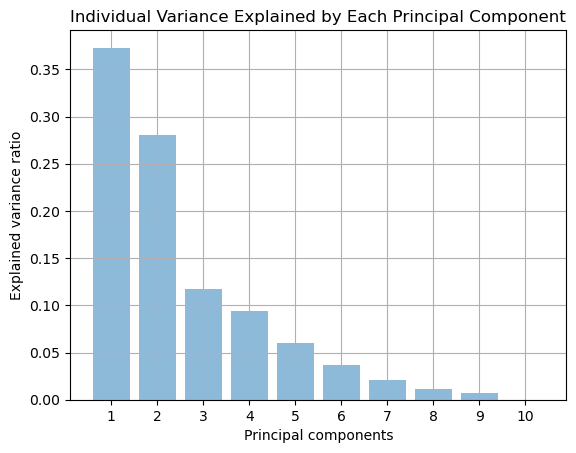

In [14]:
plt.figure()
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.title('Individual Variance Explained by Each Principal Component')
plt.grid(True)
plt.show()

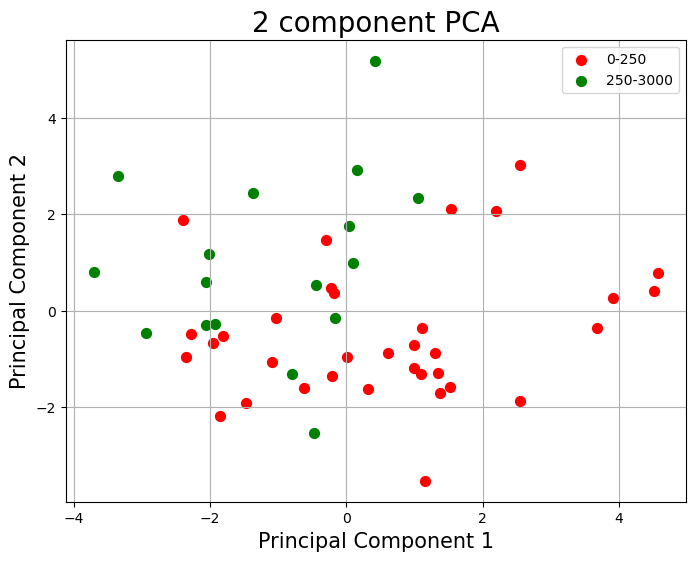

In [15]:
bins = [0, 250, 3000]  # Define bin edges
labels = ['0-250', '250-3000']  # Define bin labels
finalDf['Price_bins'] = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest=True)

pc2 = principalDf.iloc[:, :2]
pc2.columns = ['principal component 1', 'principal component 2']

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

className = ['0-250', '250-3000']

class_ = ['0-250', '250-3000']
colors = ['r', 'g']
for class_, color in zip(class_,colors):
    indicesToKeep = finalDf['Price_bins'] == class_
    ax.scatter(  pc2.loc[indicesToKeep, 'principal component 1']
               , pc2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(className)
ax.grid()

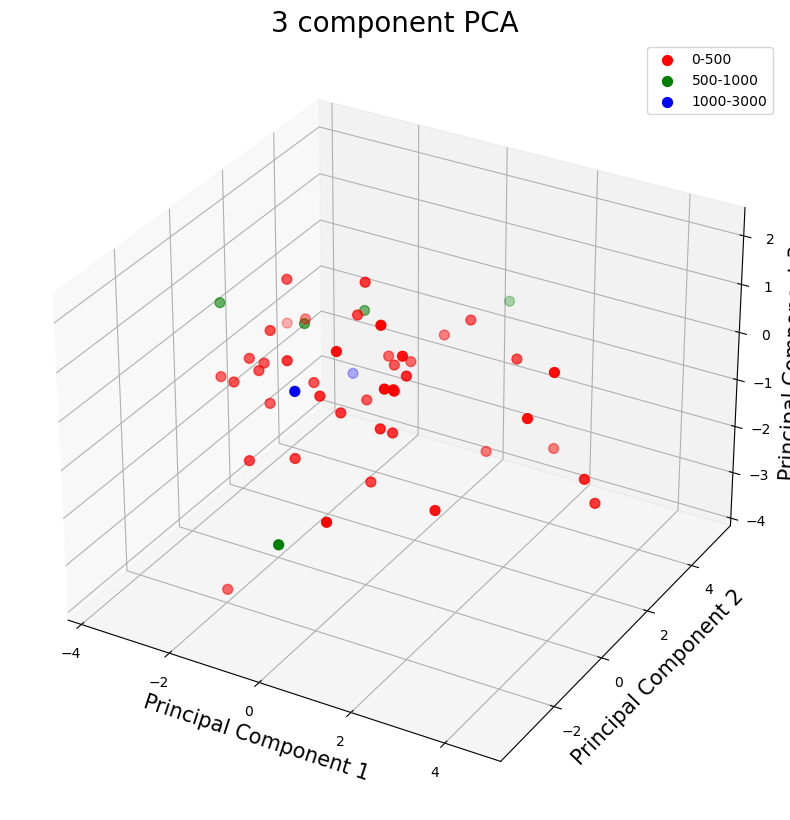

In [16]:
bins = [0, 500, 1000, 3000]  # Define bin edges
labels = ['0-500', '500-1000', '1000-3000']  # Define bin labels
finalDf['Price_bins'] = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest=True)

pc3 = principalDf.iloc[:, :3]
pc3.columns = ['principal component 1', 'principal component 2', 'principal component 3']

fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1,  projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

className = ['0-500', '500-1000', '1000-3000']

class_ = ['0-500', '500-1000', '1000-3000']
colors = ['r', 'g', 'b']
for class_, color in zip(class_,colors):
    indicesToKeep = finalDf['Price_bins'] == class_
    ax.scatter(  pc3.loc[indicesToKeep, 'principal component 1']
               , pc3.loc[indicesToKeep, 'principal component 2']
               , pc3.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(className)
ax.grid()

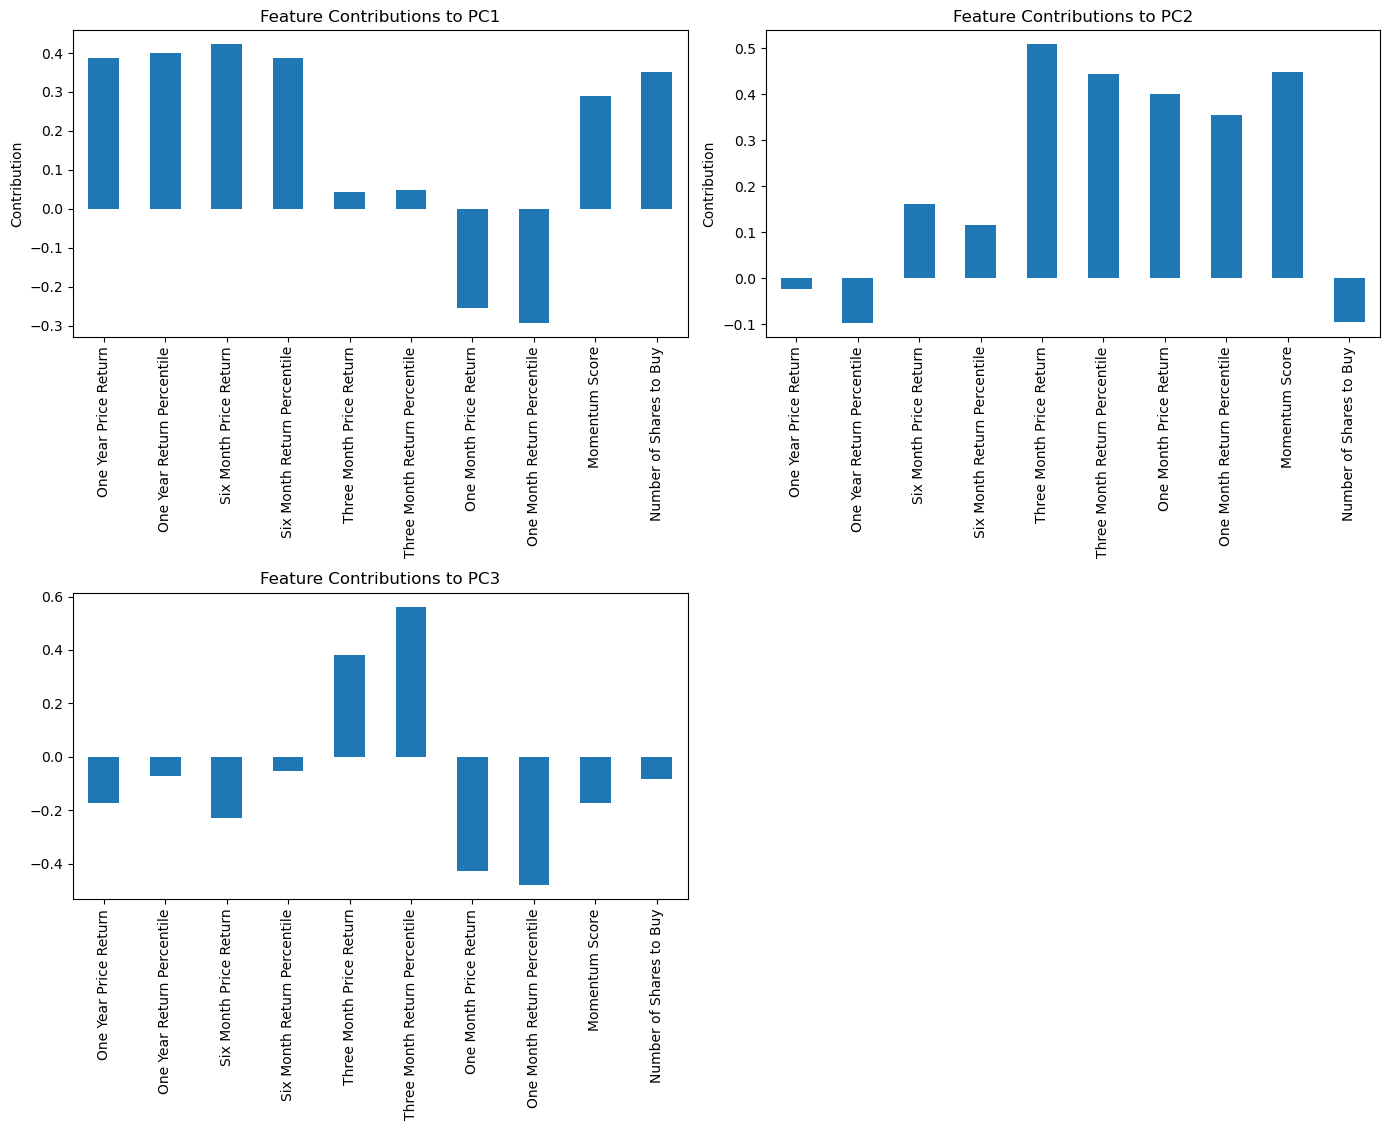

In [17]:
components = pd.DataFrame(pca.components_, columns=X.columns)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

components.iloc[0].plot(kind='bar', ax=axes[0, 0], title='Feature Contributions to PC1')
axes[0, 0].set_ylabel('Contribution')

components.iloc[1].plot(kind='bar', ax=axes[0,1], title='Feature Contributions to PC2')
axes[0, 1].set_ylabel('Contribution')

components.iloc[2].plot(kind='bar', ax=axes[1, 0], title='Feature Contributions to PC3')
axes[1, 1].set_ylabel('Contribution')

fig.delaxes(axes[1, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In [18]:
#dataframe that keeps 90% of variance 
pc90 = principalDf.iloc[:, :5]
pc90.columns = ['principal component 1', 'principal component 2', 'principal component 3', 
                'principal component 4', 'principal component 5']